# Data Loading and EDA

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

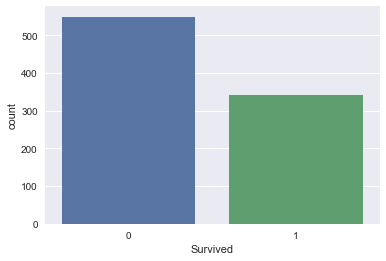

In [107]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

y_value = traindf['Survived']

# Small amount of class imbalance
y_value.value_counts()
counts = sns.countplot(y_value)

In [108]:
traindf.isnull().any().describe # Age,  Cabin and Embarked : Cabin could be converted to binary, embarked irrelevant, age annoying

<bound method NDFrame.describe of PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool>

In [109]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Individual Variable Analysis

Of note so far is the slight class imbalance of our survivors, the large amount of NaN present in Age and Cabin (and to a lesser extent Embarked) and that the test data has a single missing fare in addition to missing Ages/Cabin values. 



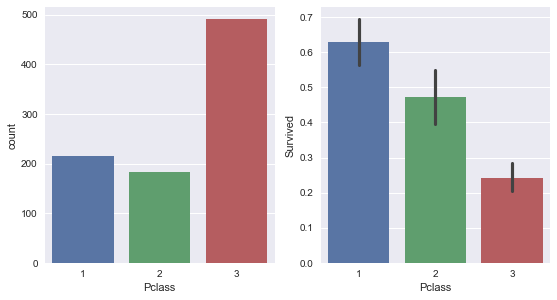

In [111]:
plt.figure(figsize=[14,16])
sns.set()

plt.subplot(331)
sns.countplot(x="Pclass", data=traindf);
plt.subplot(332)
sns.barplot('Pclass', 'Survived', data=traindf)

As is to be expected, the propotion of people rescued does not evenly reflect the social/economic class of the passengers. Those of a higher economic standing (1) appear to have been prioritised in terms of safety reflected in the fact that had a survival rate of around 62% against the 'commoners' survial rate of 25%. An analysis of fares data will likely yield similar results.

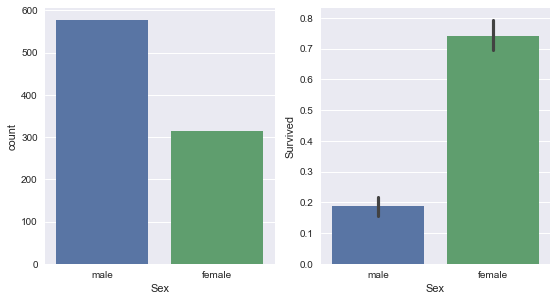

In [112]:
plt.figure(figsize=[14,16])
sns.set()

plt.subplot(331)
sns.countplot(x="Sex", data=traindf);
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=traindf)

Similarly we can see a reflection of women being given priority when exiting the sinking ship over men. Youd also expect to see a comparitively lower rate of infant mortality on the back of this.

C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

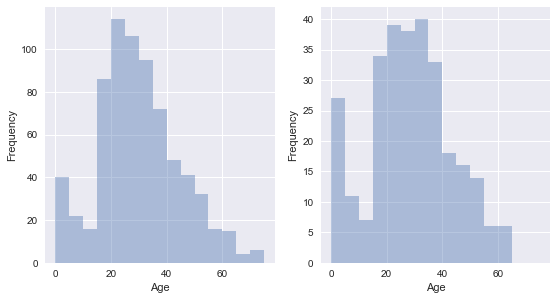

In [113]:
survival = traindf[traindf['Survived']==1]
plt.figure(figsize=[14,16])
sns.set()

plt.subplot(331)
sns.distplot(traindf['Age'].dropna().values, bins=range(0, 80, 5), kde=False)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(332)
sns.distplot(survival['Age'].dropna().values, bins=range(0, 80, 5), kde=False)
plt.xlabel("Age")
plt.ylabel("Frequency")

Albeit not the most clear to see, it appears that there was an emphasis put on saving those <10 as a propotion of total polulation. The elderly also were given precidence, perhaps due to just simply being elderly or because older people may have been of higher economic standing, correlating to our above results.

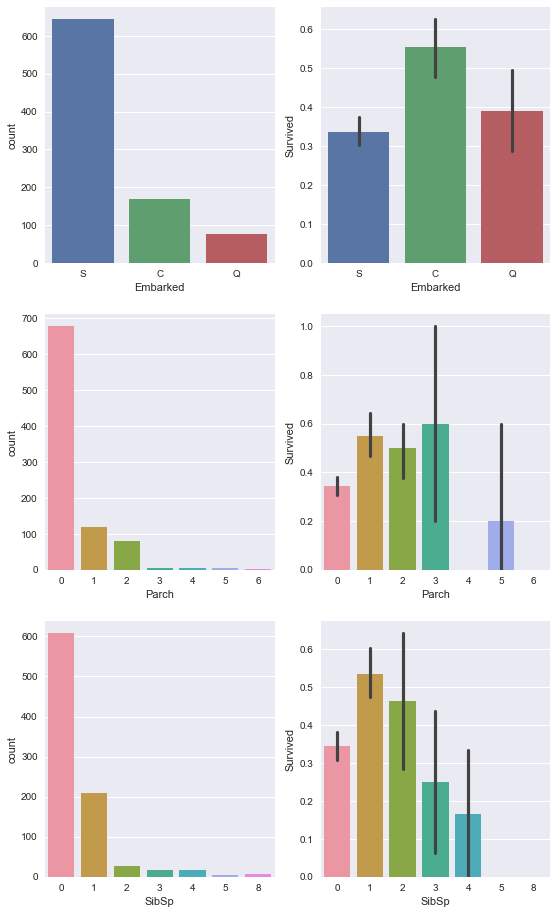

In [114]:
plt.figure(figsize=[14,16])
sns.set()

plt.subplot(331)
sns.countplot(x="Embarked", data=traindf);
plt.subplot(332)
sns.barplot('Embarked', 'Survived', data=traindf)

plt.subplot(334)
sns.countplot(x="Parch", data=traindf);
plt.subplot(335)
sns.barplot('Parch', 'Survived', data=traindf)

plt.subplot(337)
sns.countplot(x="SibSp", data=traindf);
plt.subplot(338)
sns.barplot('SibSp', 'Survived', data=traindf)

Figures for Spouses/Siblings (SibSP) and Parent/Childern (ParCh) suggests an improval of survival by being part of a 2-3 man party against those travelling alone, although the histrograms do show that there are very few examples of these cases and thus whether these effects of statistically significant could come into question. Those embarking from port C also seem to have higher survival rates, probably due to them being of wealthier backgrounds or of some other correlation - Feature relationships should be investigated.

# Feature Relationships

Its highly likely that some of our features (or subsets of our features) are correlated or share at least some commonality.

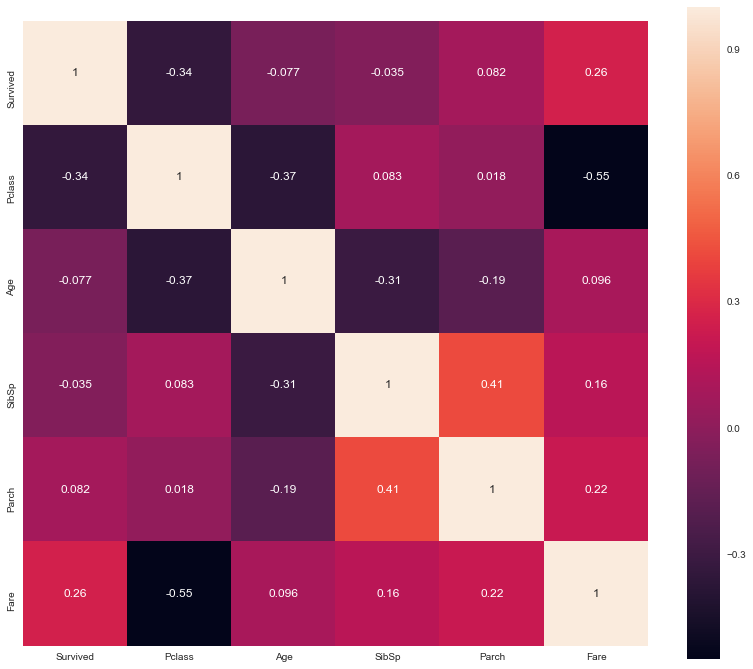

In [115]:
plt.figure(figsize=(14,12))
# cor = sns.heatmap(traindf.drop(['PassengerId', 'Survived'],axis=1).corr(), vmax=1, square=True, annot=True)
cor = sns.heatmap(traindf.drop('PassengerId',axis=1).corr(), vmax=1, square=True, annot=True)

Points of note here being the unsurprising negative corr between Ticket class and fare given how class was set up as an ordinal feature. Similar ParCh and SibSp being correlated is of no surprise to anyone. Survival and class being negatively correlated reiterates what we saw above when investigating the histrograms. Age and class correlations backup the point about elderly people having higher survival rates likely due to increased wealth. Finally +ve correlation between fare and survival lends strength to our analysis of wealth improving survival rates.

Lets take a few of the above points and delve deeper.

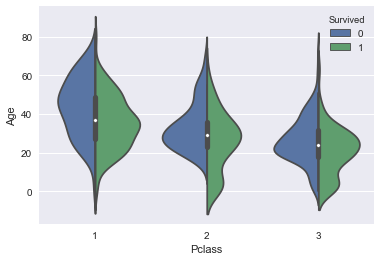

In [116]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=traindf, split=True)

The average age of those in 1st class does appear to be significantly higher than those in 2nd or 3rd class. It also appears that once in the 1st class bracket, survival chances increased for younger passengers against old. Finally there appears to be less children in 1st class, while those children in 2nd and 3rd class did seem to be prioritised for survival.

C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Female Death Age')

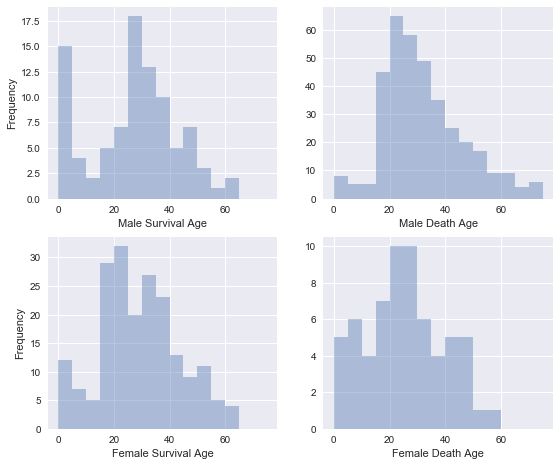

In [117]:
survm = traindf[(traindf['Sex']=='male') & (traindf['Survived']==1)]
survf = traindf[(traindf['Sex']=='female') & (traindf['Survived']==1)]
nosurvm = traindf[(traindf['Sex']=='male') & (traindf['Survived']==0)]
nosurvf = traindf[(traindf['Sex']=='female') & (traindf['Survived']==0)]

plt.figure(figsize=(14,12))
plt.subplot(331)
sns.distplot(survm['Age'].dropna().values,bins=range(0, 80, 5), kde=False)
plt.xlabel('Male Survival Age')
plt.ylabel('Frequency')
plt.subplot(332)
sns.distplot(nosurvm['Age'].dropna().values,bins=range(0, 80, 5), kde=False)
plt.xlabel('Male Death Age')
plt.subplot(334)
sns.distplot(survf['Age'].dropna().values,bins=range(0, 80, 5), kde=False)
plt.xlabel('Female Survival Age')
plt.ylabel('Frequency')
plt.subplot(335)
sns.distplot(nosurvf['Age'].dropna().values,bins=range(0, 80, 5), kde=False)
plt.xlabel('Female Death Age')


Significant differences between male and female survival rates. In addition we again can see the prioritising of children for survival.

It would appear at this point that 3 main characterstics seem to influence whether an individual survived aboard the Titanic; Age, Gender and Wealth. Factors like which port you embarked from are unlikely in themselves to aid in your survival, but rather if embarking from a certain port made it more likely that you correlated to one of the above features (namely wealth).

# Feature Engineering

The following is a list of features that we can engineer from exisiting features, to try and more specifically identify the elements that contribute to survival. We can examine each ones motivation and effect individually afterward. 

Some of the factors which have been investigated and found to be strongly correlated to our already identified effects have been ommitted for berevities sake. Some of these include:

- Large families negatively affecting survival as a result of primarily being in 3rd class.
- Certain embarking docks having higher survival rates due to having wealthier/female embarkers.

In [118]:
# Split into feature set and Y vector, Apply across training and test samples
combine = pd.concat([traindf.drop('Survived',1),testdf])
# Input median for single missing value in test fare feature
combine['Fare'].iloc[1043] = combine['Fare'][combine['Pclass'] == 3].dropna().median()
combine['Embarked'].iloc[61] = "C"
combine['Embarked'].iloc[829] = "C"
survived = traindf['Survived']


# New Variable Engineering 
combine['Child'] = combine['Age']<=10
combine['Cabin_known'] = combine['Cabin'].isnull() == False
combine['Age_known'] = combine['Age'].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone']  = (combine['SibSp'] + combine['Parch']) == 0
combine['Large_Family'] = (combine['SibSp']>2) | (combine['Parch']>3)
combine['Deck'] = combine['Cabin'].str[0]
combine['Deck'] = combine['Deck'].fillna(value='U')
# Name Format : Surname, Title. Forenames hence isolate string between , and .
# Split first into 2 elements seperated by , then again into 2 seperated by . then take first element
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combine['Young'] = (combine['Age']<=30) | (combine['Title'].isin(['Master','Miss','Mlle']))
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare'] + 1))).astype('int')
combine['Fare_eff'] = combine['Fare']/combine['Ticket_group']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5,0,combine['Fare_eff_cat'])

C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [119]:
combine.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family,Alone,Large_Family,Deck,Title,Young,Ticket_group,Fare_cat,Fare_eff,Fare_eff_cat
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,False,False,U,Mr,True,1,0,7.25000,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,False,False,C,Mrs,False,2,1,35.64165,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,True,False,U,Miss,True,1,0,7.92500,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1,False,False,C,Mrs,False,2,1,26.55000,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,True,False,U,Mr,False,1,0,8.05000,0


For use in upcoming supervised techniques we should also convert string based features to integers.

In [123]:
combine["Sex"] = combine["Sex"].astype("category")
combine["Sex"].cat.categories = [0,1]
combine["Sex"] = combine["Sex"].astype("int")
combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")
combine["Deck"] = combine["Deck"].astype("category")
combine["Deck"].cat.categories = [0,1,2,3,4,5,6,7,8]
combine["Deck"] = combine["Deck"].astype("int")

# Resplit train/test
test = combine.iloc[len(traindf):]
train = combine.iloc[:len(traindf)]
train['Survived'] = survived

# Cross Validation Split on Training
training = train.iloc[:712]
valid = train.iloc[712:]

C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Model Selection

Now that we have identified a number of explanatory features as well as expanded our feature set in pursuit of more descriptive features we can begin building a selection of models that best fit our dataset. 

In [125]:
cols = ['Sex','Pclass','Cabin_known','Large_Family','Young','Alone','Child']
tcols = np.append(['Survived'],cols)

df = training.loc[:,tcols].dropna()
X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

df_valid = valid.loc[:,tcols].dropna()
X_test = df_valid.loc[:,cols]
y_test = np.ravel(df_valid.loc[:,['Survived']])

In [137]:
model_log = LogisticRegression()
model_log = model_log.fit(X,y)
score_log = cross_val_score(model_log, X, y, cv=5).mean()
scores_log = cross_val_score(model_log, X, y, cv=5)
print(scores_log)
print(score_log)

[0.8041958  0.79020979 0.84615385 0.80985915 0.77304965]
0.8046936481758177


In [129]:
model_pctr = Perceptron(class_weight='balanced')
model_pctr = model_pctr.fit(X,y)
score_pctr = cross_val_score(model_pctr, X, y, cv=5).mean()
print(score_pctr)

0.7029230783201414


C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Fynn\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [130]:
model_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
model_knn = model_knn.fit(X,y)
score_knn = cross_val_score(model_knn, X, y, cv=5).mean()
print(score_knn)

0.7780508573436353


In [138]:
bagging = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True, max_samples=0.5, max_features=1.0
                            )
model_bag = bagging.fit(X,y)
score_bag = model_bag.oob_score_
print(score_bag)

0.7879213483146067


In [139]:
model_svm = svm.SVC(class_weight='balanced')
model_svm.fit(X, y)
score_svm = cross_val_score(model_svm, X, y, cv=5).mean()
print(score_svm)

0.8061417755154645


In [133]:
model_tree = tree.DecisionTreeClassifier(class_weight="balanced",min_weight_fraction_leaf=0.01)
model_tree = model_tree.fit(X,y)
score_tree = cross_val_score(model_tree, X, y, cv=5).mean()
print(score_tree)

0.7907277519204399


In [148]:
model_rf = RandomForestClassifier(
    n_estimators=1000, \
    max_depth=None, \
    min_samples_split=10 \
    )
model_rf = model_rf.fit(X,y)
score_rf = cross_val_score(model_rf, X, y, cv=5).mean()
print(score_rf)

0.8019162836963257


# Model Ranking and Prediction

In [142]:
comp = pd.DataFrame({
    'Model' : ['SVM', 'KNN', 'Perceptron', 'Random Forest', 'Bagged KNN',
              'Logistic Regression', 'Decision Tree'],
    'Score' : [score_svm, score_knn, score_pctr, score_rf, score_bag,
              score_log, score_tree]})
comp.sort_values(by='Score', ascending=False)

,Model,Score
0,SVM,0.806142
5,Logistic Regression,0.804694
3,Random Forest,0.800518
6,Decision Tree,0.790728
4,Bagged KNN,0.787921
1,KNN,0.778051
2,Perceptron,0.702923


In [155]:
model_svm = svm.SVC(class_weight='balanced')
model_svm.fit(X,y)
test_df=test.loc[:,cols].fillna(method='pad')
subm = model_svm.predict(test_df)

In [156]:
submission = pd.DataFrame({
    'PassengerId' : test.loc[:,'PassengerId'],
    'Survived' : subm.T})
submission.to_csv('submit.csv', index=False)